In [5]:
import haiku as hk
import jax.numpy as jnp
import jax
import tensorflow_datasets as tfds

In [6]:
hk

<module 'haiku' from '/home/eddie/anaconda3/envs/flow/lib/python3.7/site-packages/haiku/__init__.py'>

In [42]:
def load_dataset(split, is_training, batch_size):
    ds = tfds.load("celeb_a", split=split).cache().repeat()
    if is_training:
        ds = ds.shuffle(10 * batch_size, seed=0)
    ds = ds.batch(batch_size)
    return tfds.as_numpy(ds)

In [43]:
def net_fn(batch):
    x = batch['image'].astype(jnp.float32) / 255.
    mlp = hk.Sequential([
      hk.Flatten(),
      hk.Linear(300), jax.nn.relu,
      hk.Linear(100), jax.nn.relu,
      hk.Linear(10),
    ])
    return mlp(x)

net = hk.transform(net_fn)

In [44]:
train = load_dataset("train", is_training=True, batch_size=1000)

/home/eddie/anaconda3/envs/flow/lib/python3.7/site-packages/urllib3/connectionpool.py:986: InsecureRequestWarning: Unverified HTTPS request is being made to host 'drive.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,
/home/eddie/anaconda3/envs/flow/lib/python3.7/site-packages/urllib3/connectionpool.py:986: InsecureRequestWarning: Unverified HTTPS request is being made to host 'drive.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,
/home/eddie/anaconda3/envs/flow/lib/python3.7/site-packages/urllib3/connectionpool.py:986: InsecureRequestWarning: Unverified HTTPS request is being made to host 'drive.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  Inse

Shuffling and writing examples to /home/eddie/tensorflow_datasets/celeb_a/2.0.1.incompleteK05LKJ/celeb_a-train.tfrecord


Shuffling and writing examples to /home/eddie/tensorflow_datasets/celeb_a/2.0.1.incompleteK05LKJ/celeb_a-validation.tfrecord


Shuffling and writing examples to /home/eddie/tensorflow_datasets/celeb_a/2.0.1.incompleteK05LKJ/celeb_a-test.tfrecord


Dataset celeb_a downloaded and prepared to /home/eddie/tensorflow_datasets/celeb_a/2.0.1. Subsequent calls will reuse this data.


In [45]:
x = next(train)

In [47]:
x.keys()

dict_keys(['attributes', 'image', 'landmarks'])

In [50]:
x['image'].shape

(1000, 218, 178, 3)

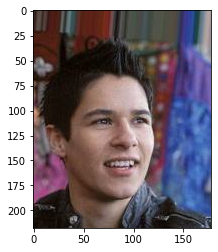

In [53]:
import matplotlib.pyplot as plt
plt.imshow(x['image'][0])

In [14]:
params = net.init(jax.random.PRNGKey(42), next(train))

In [15]:
net.apply(params, next(train))

DeviceArray([[ 0.01545822, -0.10777152,  0.10775827, ..., -0.07134939,
              -0.15801159, -0.07453628],
             [ 0.05616835, -0.06417418, -0.00788304, ..., -0.00439431,
              -0.17631331, -0.0381822 ],
             [-0.01838907, -0.17395708, -0.05027116, ..., -0.02319684,
              -0.2761431 , -0.16127874],
             ...,
             [ 0.01819235, -0.02908304,  0.01233403, ..., -0.06196837,
              -0.15272908,  0.00103908],
             [ 0.00490629, -0.10792165, -0.08387974, ..., -0.11235812,
              -0.18071723, -0.04745626],
             [-0.02536447, -0.06420236, -0.02348571, ...,  0.03111907,
              -0.09970631, -0.03526445]], dtype=float32)

In [33]:
import numpy as np
input_sel = np.array([1, 5, 2, 3, 4, 0])
i = np.arange(6)
np.argwhere(input_sel == i[:,None])

array([[0, 5],
       [1, 0],
       [2, 2],
       [3, 3],
       [4, 4],
       [5, 1]])

In [35]:
np.nonzero(input_sel == i[:,None])[1]

array([5, 0, 2, 3, 4, 1])

In [38]:
jnp.tanh

<function jax.numpy.lax_numpy._one_to_one_unop.<locals>.fn(x)>

In [41]:
jax.nn.relu